### Scikit Learn website
#### https://scikit-learn.org/stable/
### Linear Regression - ordinary-least-squares
#### https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

# Linear Regression - Baiscs

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Height-Weight-Data.csv')  # for excel:  pd.read_excel('Height-Weight-Data.xlsx')

In [7]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [9]:
df.head(8)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111


In [13]:
df.Height.head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [14]:
df['Weight'].head(4)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
Name: Weight, dtype: float64

In [15]:
df[5:7]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889


In [16]:
df[5:12]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926
11,71.640805,213.741169


In [17]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [18]:
df.Height.mean()

69.02441087268797

In [19]:
df.Weight.mean()

186.89125797946284

In [20]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [21]:
df.Height.std()

2.8585833281420983

In [23]:
df.Height.max()

78.99874235

In [25]:
df.shape

(3501, 2)

In [26]:
row, col = df.shape

In [27]:
row

3501

In [28]:
col

2

In [29]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height vs Weight')

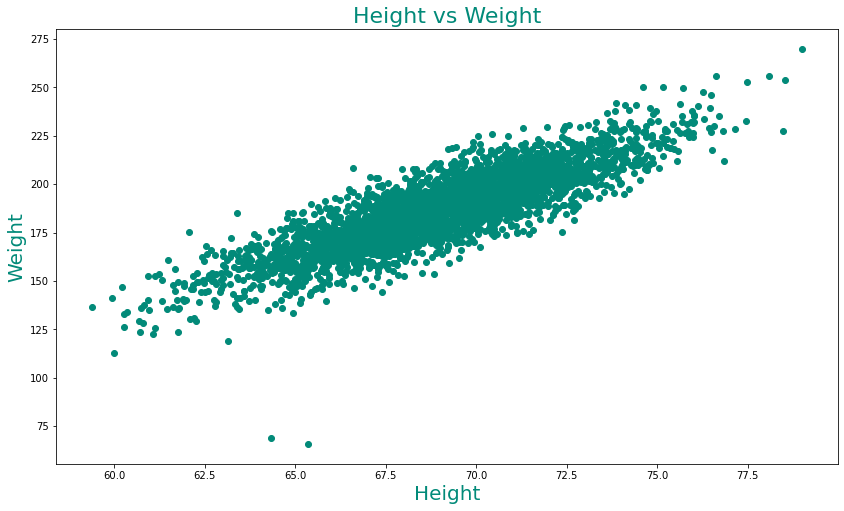

In [51]:
plt.figure(figsize=(14,8))
plt.scatter(df.Height , df.Weight, marker='o' , color='#028A79') # https://htmlcolorcodes.com/
plt.xlabel('Height', color='#028A79', fontsize='20')
plt.ylabel('Weight', color='#028A79', fontsize='20')
plt.title('Height vs Weight', color='#028A79', fontsize='22')

In [55]:
x = df['Height'] # single dimension is not allowed
y = df['Weight']

In [53]:
x.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [56]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [75]:
x = df[['Height']] # x = df.drop('Height', axis=1) ; x = df.drop(columns=['Height'])
y = df['Weight']

In [76]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [77]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Split the dataset into train and test

In [78]:
from sklearn.model_selection import train_test_split as tts

In [79]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=.30)

In [80]:
xtrain.head()

,Height
916,69.691743
3075,72.289596
877,64.457858
3040,67.971721
532,69.641906


In [81]:
ytrain.head()

916     184.618953
3075    213.896690
877     158.916699
3040    166.311930
532     182.004522
Name: Weight, dtype: float64

# Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
reg = LinearRegression()

In [84]:
# Training
reg.fit(xtrain,ytrain) 

LinearRegression()

In [85]:
m = reg.coef_
m

array([5.89477633])

In [86]:
c = reg.intercept_
c

-219.9870546971051

In [87]:
x1 = 71
y = m * x1 + c

In [88]:
y

array([198.54206467])

In [90]:
reg.predict([[71]])

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([198.54206467])

In [91]:
predict = reg.predict(xtest)

In [92]:
predict

array([173.16687535, 192.18834109, 184.81482475, ..., 200.95725209,
       213.4321773 , 184.14910479])

In [100]:
df['Predicted Result'] = reg.predict(x)

In [101]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.324593
1,68.781904,162.310473,185.466885
2,74.110105,212.740856,216.875440
3,71.730978,220.042470,202.851019
4,69.881796,206.349801,191.950501


In [102]:
x1 = 74.110105
y = m * x1 + c
y

array([216.875438])

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
mse = mean_squared_error(ytest, predict)
mse

102.11354316022341

In [106]:
mae = mean_absolute_error(ytest, predict)
mae

8.056751779874824

# Best Fit Line

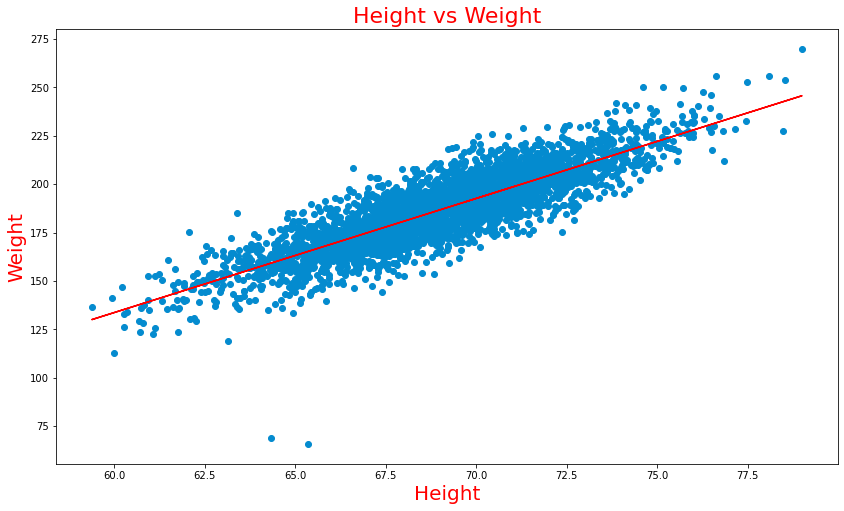

In [119]:
plt.figure(figsize=(14,8))
plt.scatter(df.Height, df.Weight, marker='o', color='#048BCF')
plt.xlabel('Height', color='red', fontsize='20')
plt.ylabel('Weight', color='red',fontsize='20')
plt.title('Height vs Weight', color='red', fontsize='22')
plt.plot(xtrain, reg.predict(xtrain), color='red')

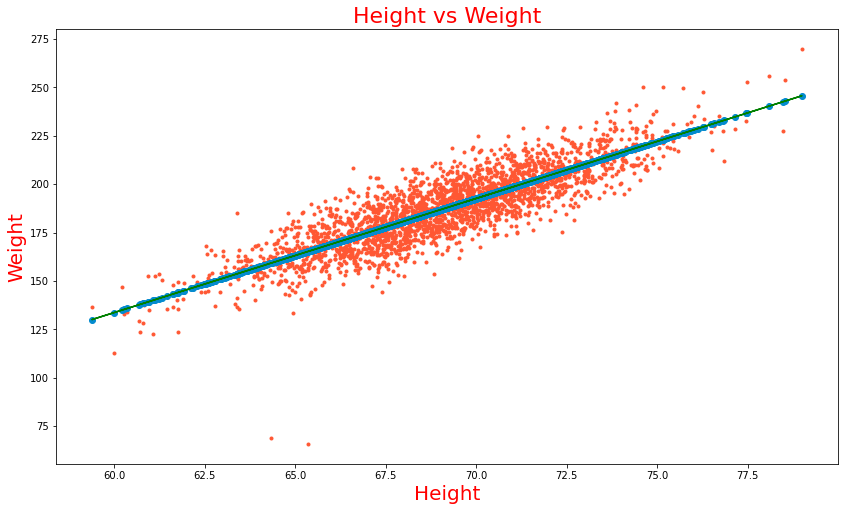

In [129]:
plt.figure(figsize=(14,8))
plt.xlabel('Height', color='red', fontsize='20')
plt.ylabel('Weight', color='red',fontsize='20')
plt.title('Height vs Weight', color='red', fontsize='22')
plt.plot(xtrain, reg.predict(xtrain), color='green')
plt.scatter(xtrain, ytrain, marker='.', color='#FF5733')
plt.scatter(xtrain, reg.predict(xtrain), marker='o', color='#048BCF')



In [130]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[70]])

array([192.64728834])

In [131]:
reg.score(xtest, ytest)

0.7505444944017582

In [133]:
from sklearn.metrics import r2_score
r2_score(ytest, predict)

0.7505444944017582